In [ ]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.2 MB/s eta 0:00:00


In [ ]:
from datasets import load_dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from pprint import pprint
# Download NLTK stop words
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
!pip install -q transformers==4.37.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 17.4 MB/s eta 0:00:00


In [ ]:
!pip install pydot

In [ ]:
from transformers import BertTokenizer, TFBertModel

In [ ]:
dataset = load_dataset("orieg/elsevier-oa-cc-by")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/datasets/load.py:1461: FutureWarning: The repository for orieg/elsevier-oa-cc-by contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/orieg/elsevier-oa-cc-by
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datas

Generating train split:   0%|          | 0/32072 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/4008 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/4009 [00:00<?, ? examples/s]

In [ ]:
elsevier_dataset = dataset

In [ ]:
print(elsevier_dataset)

DatasetDict({
    train: Dataset({
        features: ['title', 'abstract', 'subjareas', 'keywords', 'asjc', 'body_text', 'author_highlights'],
        num_rows: 32072
    })
    test: Dataset({
        features: ['title', 'abstract', 'subjareas', 'keywords', 'asjc', 'body_text', 'author_highlights'],
        num_rows: 4008
    })
    validation: Dataset({
        features: ['title', 'abstract', 'subjareas', 'keywords', 'asjc', 'body_text', 'author_highlights'],
        num_rows: 4009
    })
})


In [ ]:
train_set = elsevier_dataset['train']
train_df = pd.DataFrame(train_set)
print("Shape of the training set:", train_df.shape)


Shape of the training set: (32072, 7)


Check for class Imbalance

In [ ]:
label_counts = pd.Series([label for sublist in train_df['subjareas'] for label in sublist]).value_counts()
label_counts_df = label_counts.reset_index()
label_counts_df.columns = ['Subject Area', 'Frequency']

fig = px.bar(label_counts_df, x='Subject Area', y='Frequency', title='Frequency of Each Subject Area Label')
fig.show()


In [ ]:
val_set = elsevier_dataset['validation']
val_df = pd.DataFrame(val_set)

test_set = elsevier_dataset['test']
test_df = pd.DataFrame(test_set)

In [ ]:
print(val_df.shape)
print(test_df.shape)

(4009, 7)
(4008, 7)


In [ ]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32072 entries, 0 to 32071
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   title              32072 non-null  object
 1   abstract           32072 non-null  object
 2   subjareas          32072 non-null  object
 3   keywords           32072 non-null  object
 4   asjc               32072 non-null  object
 5   body_text          32072 non-null  object
 6   author_highlights  32072 non-null  object
dtypes: object(7)
memory usage: 1.7+ MB
None


In [ ]:
train_df.head()

,title,abstract,subjareas,keywords,asjc,body_text,author_highlights
0,Reactive Oxygen Species Localization Programs ...,How the number of immune cells recruited to si...,"[IMMU, MEDI]","[Candida albicans, cellular stoichiometry, clu...","[2403, 2723, 2725]",[Neutrophil recruitment is a central aspect of...,[The clearance of microbes of different size i...
1,Evaluation of novel derivatisation reagents fo...,Oxysterols are oxidised forms of cholesterol t...,[BIOC],"[Derivatisation, Girard P reagent, Liquid chro...","[1303, 1304, 1307, 1312]",[Oxysterols are neutral lipids formed by oxida...,[New derivatisation reagents for LC–MS analysi...
2,Comparative Life Cycle Assessment of ceramic v...,The Brazilian ceramic industry is responsible ...,"[BUSI, ENER, ENGI, ENVI]","[Assessment, Brazil, Ceramic tiles, Concrete t...","[1408, 2105, 2209, 2300]",[The construction industry is increasingly con...,[We modeled the life cycle environmental impac...
3,Effect of group walking traffic on dynamic pro...,The increasing number of reported vibration se...,"[ENGI, PHYS]","[Crowd, Floor, Footbridge, Human-structure dyn...","[2210, 2211, 3102, 3104]","[Over the past two decades, there has been a g...",[]
4,Investigation into the CO2 concentrating step ...,Synechocystis sp. PCC6803 actively uptake inor...,[AGRI],"[CCM, CO2, Gas exchange, MIMS, NDH-I, Synechoc...",[1102],[Photosynthetic organisms can fixate carbon di...,[Novel method to calculate CO2 uptake rate in ...


<!-- Drop All subjareas that have a frequency count of less than 1000 -->
Handle class Imbalance by merging some of the classes
Health, Dent, Nurs, Vent —> Medicine
9:28
Econ, Arts, Busi, Deci --> Soci
9:28
Math —> Multi

In [ ]:
def adjust_subjareas(subjareas_list):
    if any(area in subjareas_list for area in ['VETE', 'HEAL', 'DENT', 'NURS']):
        return ['MEDI']
    elif any(area in subjareas_list for area in ['ECON', 'ARTS', 'BUSI', 'DECI']):
        return ['SOCI']
    elif 'MATH' in subjareas_list:
        return ['MULT']
    else:
        return subjareas_list

train_df['subjareas'] = train_df['subjareas'].apply(adjust_subjareas)
val_df['subjareas'] = val_df['subjareas'].apply(adjust_subjareas)
test_df['subjareas'] = test_df['subjareas'].apply(adjust_subjareas)

In [ ]:
print(train_df.shape)
print(val_df.shape)
print(test_df.shape)

(32072, 7)
(4009, 7)
(4008, 7)


In [ ]:
# Function to count the adjusted subject areas
def count_subjareas(df):
    # Flatten the list of subject areas and count each occurrence
    return pd.Series([subj for sublist in df['subjareas'] for subj in sublist]).value_counts()

# Get the counts for each DataFrame
train_counts = count_subjareas(train_df)
val_counts = count_subjareas(val_df)
test_counts = count_subjareas(test_df)

# Print the counts
print('Training Set Subject Area Counts:')
print(train_counts)
print('\nValidation Set Subject Area Counts:')
print(val_counts)
print('\nTest Set Subject Area Counts:')
print(test_counts)


Training Set Subject Area Counts:
MEDI    6623
BIOC    5351
ENVI    4242
SOCI    3936
AGRI    3438
ENGI    3430
MULT    3392
NEUR    2804
MATE    2670
CHEM    1973
ENER    1969
PHYS    1868
PHAR    1860
EART    1854
IMMU    1827
CENG    1470
COMP    1282
PSYC     984
dtype: int64

Validation Set Subject Area Counts:
MEDI    855
BIOC    676
ENVI    545
SOCI    472
ENGI    431
MULT    411
AGRI    394
NEUR    370
MATE    357
PHAR    271
ENER    266
CHEM    263
IMMU    240
PHYS    237
CENG    194
EART    186
COMP    173
PSYC    135
dtype: int64

Test Set Subject Area Counts:
MEDI    810
BIOC    611
ENVI    524
MULT    485
SOCI    464
ENGI    431
AGRI    411
MATE    373
NEUR    361
IMMU    246
PHAR    243
EART    235
ENER    235
CHEM    227
PHYS    216
CENG    204
COMP    156
PSYC    134
dtype: int64


In [ ]:
label_counts = pd.Series([label for sublist in train_df['subjareas'] for label in sublist]).value_counts()
label_counts_df = label_counts.reset_index()
label_counts_df.columns = ['Subject Area', 'Frequency']

fig = px.bar(label_counts_df, x='Subject Area', y='Frequency', title='Frequency of Each Subject Area Label')
fig.show()


step 2: Handle further class imbalance

Step 2: Data Pre-processing

In [ ]:
def prepare_elsevier_data(train_df, val_df, test_df):
    """
    Prepares the Elsevier corpus splits for multi-label classification without splitting.

    Args:
    - train_df: DataFrame containing the training dataset with columns 'abstract' and 'subjareas'.
    - val_df: DataFrame containing the validation dataset with columns 'abstract' and 'subjareas'.
    - test_df: DataFrame containing the test dataset with columns 'abstract' and 'subjareas'.

    Returns:
    - train_texts, val_texts, test_texts: Lists containing texts for training, validation, and testing.
    - train_labels, val_labels, test_labels: Arrays containing encoded labels for training, validation, and testing.
    - target_names: List of unique labels (subject areas).
    """
    mlb = MultiLabelBinarizer()

    all_labels = pd.concat([train_df['subjareas'], val_df['subjareas'], test_df['subjareas']])
    mlb.fit(all_labels)

    train_labels = mlb.transform(train_df['subjareas'])
    val_labels = mlb.transform(val_df['subjareas'])
    test_labels = mlb.transform(test_df['subjareas'])

    train_texts = train_df['abstract'].tolist()
    val_texts = val_df['abstract'].tolist()
    test_texts = test_df['abstract'].tolist()

    return train_texts, val_texts, test_texts, train_labels, val_labels, test_labels, mlb.classes_

train_texts, val_texts, test_texts, train_labels, val_labels, test_labels, target_names = prepare_elsevier_data(train_df, val_df, test_df)

In [ ]:
print(train_labels[:2])
print(train_texts[:2])
print(len(target_names))

[[0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
['How the number of immune cells recruited to sites of infection is determined and adjusted to differences in the cellular stoichiometry between host and pathogen is unknown. Here, we have uncovered a role for reactive oxygen species (ROS) as sensors of microbe size. By sensing the differential localization of ROS generated in response to microbes of different size, neutrophils tuned their interleukin (IL)-1β expression via the selective oxidation of NF-κB, in order to implement distinct inflammatory programs. Small microbes triggered ROS intracellularly, suppressing IL-1β expression to limit neutrophil recruitment as each phagocyte eliminated numerous pathogens. In contrast, large microbes triggered ROS extracellularly, amplifying IL-1β expression to recruit numerous neutrophils forming cooperative clusters. Defects in ROS-mediated microbe size sensing resulted in large neutrophil infiltrates and clusters i

In [ ]:
# label_counts = pd.Series([label for sublist in train_df['subjareas'] for label in sublist]).value_counts()

# label_count_dict = label_counts.to_dict()

# total_count = sum(label_count_dict.values())
# num_classes = len(label_count_dict)
# class_weights = {label: total_count / (num_classes * count) for label, count in label_count_dict.items()}


In [ ]:
print(len(train_texts))
print(len(val_texts))

32072
4009


In [ ]:
# Convert validation labels to a NumPy array
npvalid_labels = np.asarray(val_labels)


step 3: Classification with fine tuned BERT Model

In [ ]:
model_checkpoint = 'bert-base-cased'

In [ ]:
bert_tokenizer = BertTokenizer.from_pretrained(model_checkpoint)
bert_model = TFBertModel.from_pretrained(model_checkpoint)


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

step 3: Set maximum dimension length based on the data

In [ ]:
max_length = 300

Step 4: Apply tokenization process to  Elsevier corpus. Tokenization converts your text data into a format that the BERT model can understand and process. It involves splitting the text into tokens (words or subwords), truncating sequences to the maximum length (max_length), and padding shorter sequences with zeros.

In [ ]:
train_encodings = bert_tokenizer(train_texts, truncation=True, padding=True, max_length=max_length, return_tensors='tf')
valid_encodings = bert_tokenizer(val_texts, truncation=True, padding=True, max_length=max_length, return_tensors='tf')
test_encodings = bert_tokenizer(test_texts, truncation=True, padding=True, max_length=max_length, return_tensors='tf')

In [ ]:
# Assuming train_encodings is the result of the tokenizer
input_ids_shape = train_encodings.input_ids.shape
token_type_ids_shape = train_encodings.token_type_ids.shape
attention_mask_shape = train_encodings.attention_mask.shape

print(f"Input IDs shape: {input_ids_shape}")
print(f"Token Type IDs shape: {token_type_ids_shape}")
print(f"Attention Mask shape: {attention_mask_shape}")


val_ids_shape = valid_encodings.input_ids.shape
val_token_type_ids_shape = valid_encodings.token_type_ids.shape
val_attention_mask_shape = valid_encodings.attention_mask.shape

print("\n")

print(f"Input IDs shape: {val_ids_shape}")
print(f"Token Type IDs shape: {val_token_type_ids_shape}")
print(f"Attention Mask shape: {val_attention_mask_shape}")


test_ids_shape = test_encodings.input_ids.shape
test_token_type_ids_shape = test_encodings.token_type_ids.shape
test_attention_mask_shape = test_encodings.attention_mask.shape

print("\n")


print(f"Input IDs shape: {test_ids_shape}")
print(f"Token Type IDs shape: {test_token_type_ids_shape}")
print(f"Attention Mask shape: {test_attention_mask_shape}")


Input IDs shape: (32072, 300)
Token Type IDs shape: (32072, 300)
Attention Mask shape: (32072, 300)


Input IDs shape: (4009, 300)
Token Type IDs shape: (4009, 300)
Attention Mask shape: (4009, 300)


Input IDs shape: (4008, 300)
Token Type IDs shape: (4008, 300)
Attention Mask shape: (4008, 300)


In [ ]:
import pandas as pd
import numpy as np

def compute_sample_weights(df, label_column):
    """
    Compute sample weights for multi-label classification.

    Parameters:
    - df: pandas DataFrame containing the training data
    - label_column: string name of the DataFrame column containing the labels lists

    Returns:
    - sample_weights: numpy array of sample weights where rows correspond to samples
    """
    label_freq = pd.Series([label for sublist in df[label_column] for label in sublist]).value_counts()

    label_weights = 1 / label_freq

    label_weights /= label_weights.sum()

    label_weight_map = label_weights.to_dict()

    sample_weights = []

    for labels in df[label_column]:
        sample_weight = sum([label_weight_map[label] for label in labels])
        sample_weights.append(sample_weight)

    return np.array(sample_weights)

sample_weights = compute_sample_weights(train_df, 'subjareas')


Step 4: Create a multiclass BERT model

multi-label binarization to convert the subject area labels into a binary format, where each label is represented by a 0 (absence) or 1 (presence).

BERT Model Configuration: A pre-trained BERT model (bert-base-cased) was chosen as the base for feature extraction. On top of it, a custom model was built for classification.

Custom Model: Added dense layers on top of BERT's pooled output, including a final dense layer with a sigmoid activation function to handle multi-label classification.

Loss Function: Used BinaryCrossentropy to treat each output label as an independent binary classification problem.
Optimizer: An Adam optimizer with a learning rate of 0.00005 was configured.


In [ ]:
def create_bert_multilabel_model(bert_model, num_classes, max_length, hidden_size=512, dropout=0.3, learning_rate=0.00005):
    """
    Build a simple classification model with BERT for multi-label classification.
    """
    bert_model.trainable = True

    input_ids = tf.keras.layers.Input(shape=(max_length,), dtype=tf.int32, name='input_ids')
    token_type_ids = tf.keras.layers.Input(shape=(max_length,), dtype=tf.int32, name='token_type_ids')
    attention_mask = tf.keras.layers.Input(shape=(max_length,), dtype=tf.int32, name='attention_mask')

    bert_output = bert_model(input_ids=input_ids, token_type_ids=token_type_ids, attention_mask=attention_mask)
    pooled_output = bert_output.pooler_output

    hidden = tf.keras.layers.Dense(hidden_size, activation='relu')(pooled_output)
    hidden = tf.keras.layers.Dropout(dropout)(hidden)
    output_classification = tf.keras.layers.Dense(num_classes, activation='sigmoid')(hidden)

    classification_model = tf.keras.Model(inputs=[input_ids, token_type_ids, attention_mask], outputs=[output_classification])
    classification_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                                 loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
                                 metrics=['accuracy'])

    return classification_model

In [ ]:
num_subject_areas = len(target_names)
num_subject_areas

18

In [ ]:
pooler_bert_model = create_bert_multilabel_model(bert_model=bert_model,
                                                 num_classes=num_subject_areas,
                                                 max_length=max_length,
                                                 hidden_size=512,
                                                 dropout=0.3,
                                                 learning_rate=0.00005)


In [ ]:
pooler_bert_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 300)]                0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 300)]                0         []                            
 )                                                                                                
                                                                                                  
 token_type_ids (InputLayer  [(None, 300)]                0         []                            
 )                                                                                                
                                                                                              

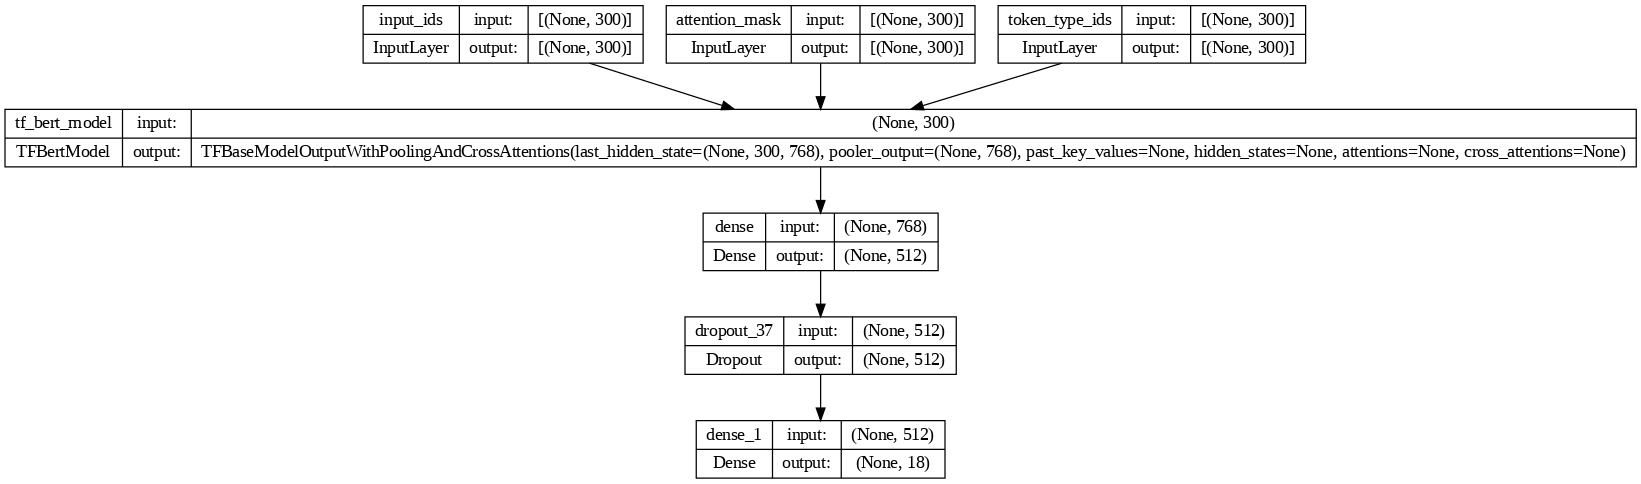

In [ ]:
keras.utils.plot_model(pooler_bert_model, show_shapes=True, show_dtype=False, show_layer_names=True, dpi=90)

In [ ]:
#It takes 10 to 14 minutes to complete an epoch when using a GPU
pooler_bert_model_history = pooler_bert_model.fit([train_encodings.input_ids, train_encodings.token_type_ids, train_encodings.attention_mask],
                                                  train_labels,
                                                  validation_data=([valid_encodings.input_ids, valid_encodings.token_type_ids, valid_encodings.attention_mask],
                                                  npvalid_labels),
                                                  batch_size=8,
                                                  epochs=2, sample_weight=sample_weights)

Epoch 1/2
4009/4009 [==============================] - 2345s 575ms/step - loss: 0.0175 - accuracy: 0.3945 - val_loss: 0.1708 - val_accuracy: 0.4832
Epoch 2/2
4009/4009 [==============================] - 2304s 575ms/step - loss: 0.0142 - accuracy: 0.4905 - val_loss: 0.1631 - val_accuracy: 0.5156


Validation Data Set Evaluation

In [ ]:
val_score = pooler_bert_model.evaluate([valid_encodings.input_ids, valid_encodings.token_type_ids, valid_encodings.attention_mask],
                                                  val_labels)

print('Val loss:', val_score[0])
print('Val accuracy:', val_score[1])

126/126 [==============================] - 91s 719ms/step - loss: 0.1631 - accuracy: 0.5156
Val loss: 0.1631082147359848
Val accuracy: 0.5155899524688721


In [ ]:
val_predictions = pooler_bert_model.predict([valid_encodings.input_ids, valid_encodings.token_type_ids, valid_encodings.attention_mask])

126/126 [==============================] - 93s 717ms/step


126/126 [==============================] - 90s 718ms/step
              precision    recall  f1-score   support

        AGRI       0.70      0.62      0.66       394
        BIOC       0.64      0.57      0.60       676
        CENG       0.43      0.38      0.40       194
        CHEM       0.49      0.44      0.46       263
        COMP       0.44      0.32      0.37       173
        EART       0.55      0.75      0.63       186
        ENER       0.68      0.52      0.59       266
        ENGI       0.53      0.63      0.58       431
        ENVI       0.63      0.48      0.54       545
        IMMU       0.46      0.71      0.56       240
        MATE       0.66      0.63      0.64       357
        MEDI       0.71      0.77      0.74       855
        MULT       0.94      0.60      0.73       411
        NEUR       0.75      0.75      0.75       370
        PHAR       0.58      0.55      0.56       271
        PHYS       0.50      0.57      0.53       237
        PSYC       0.45

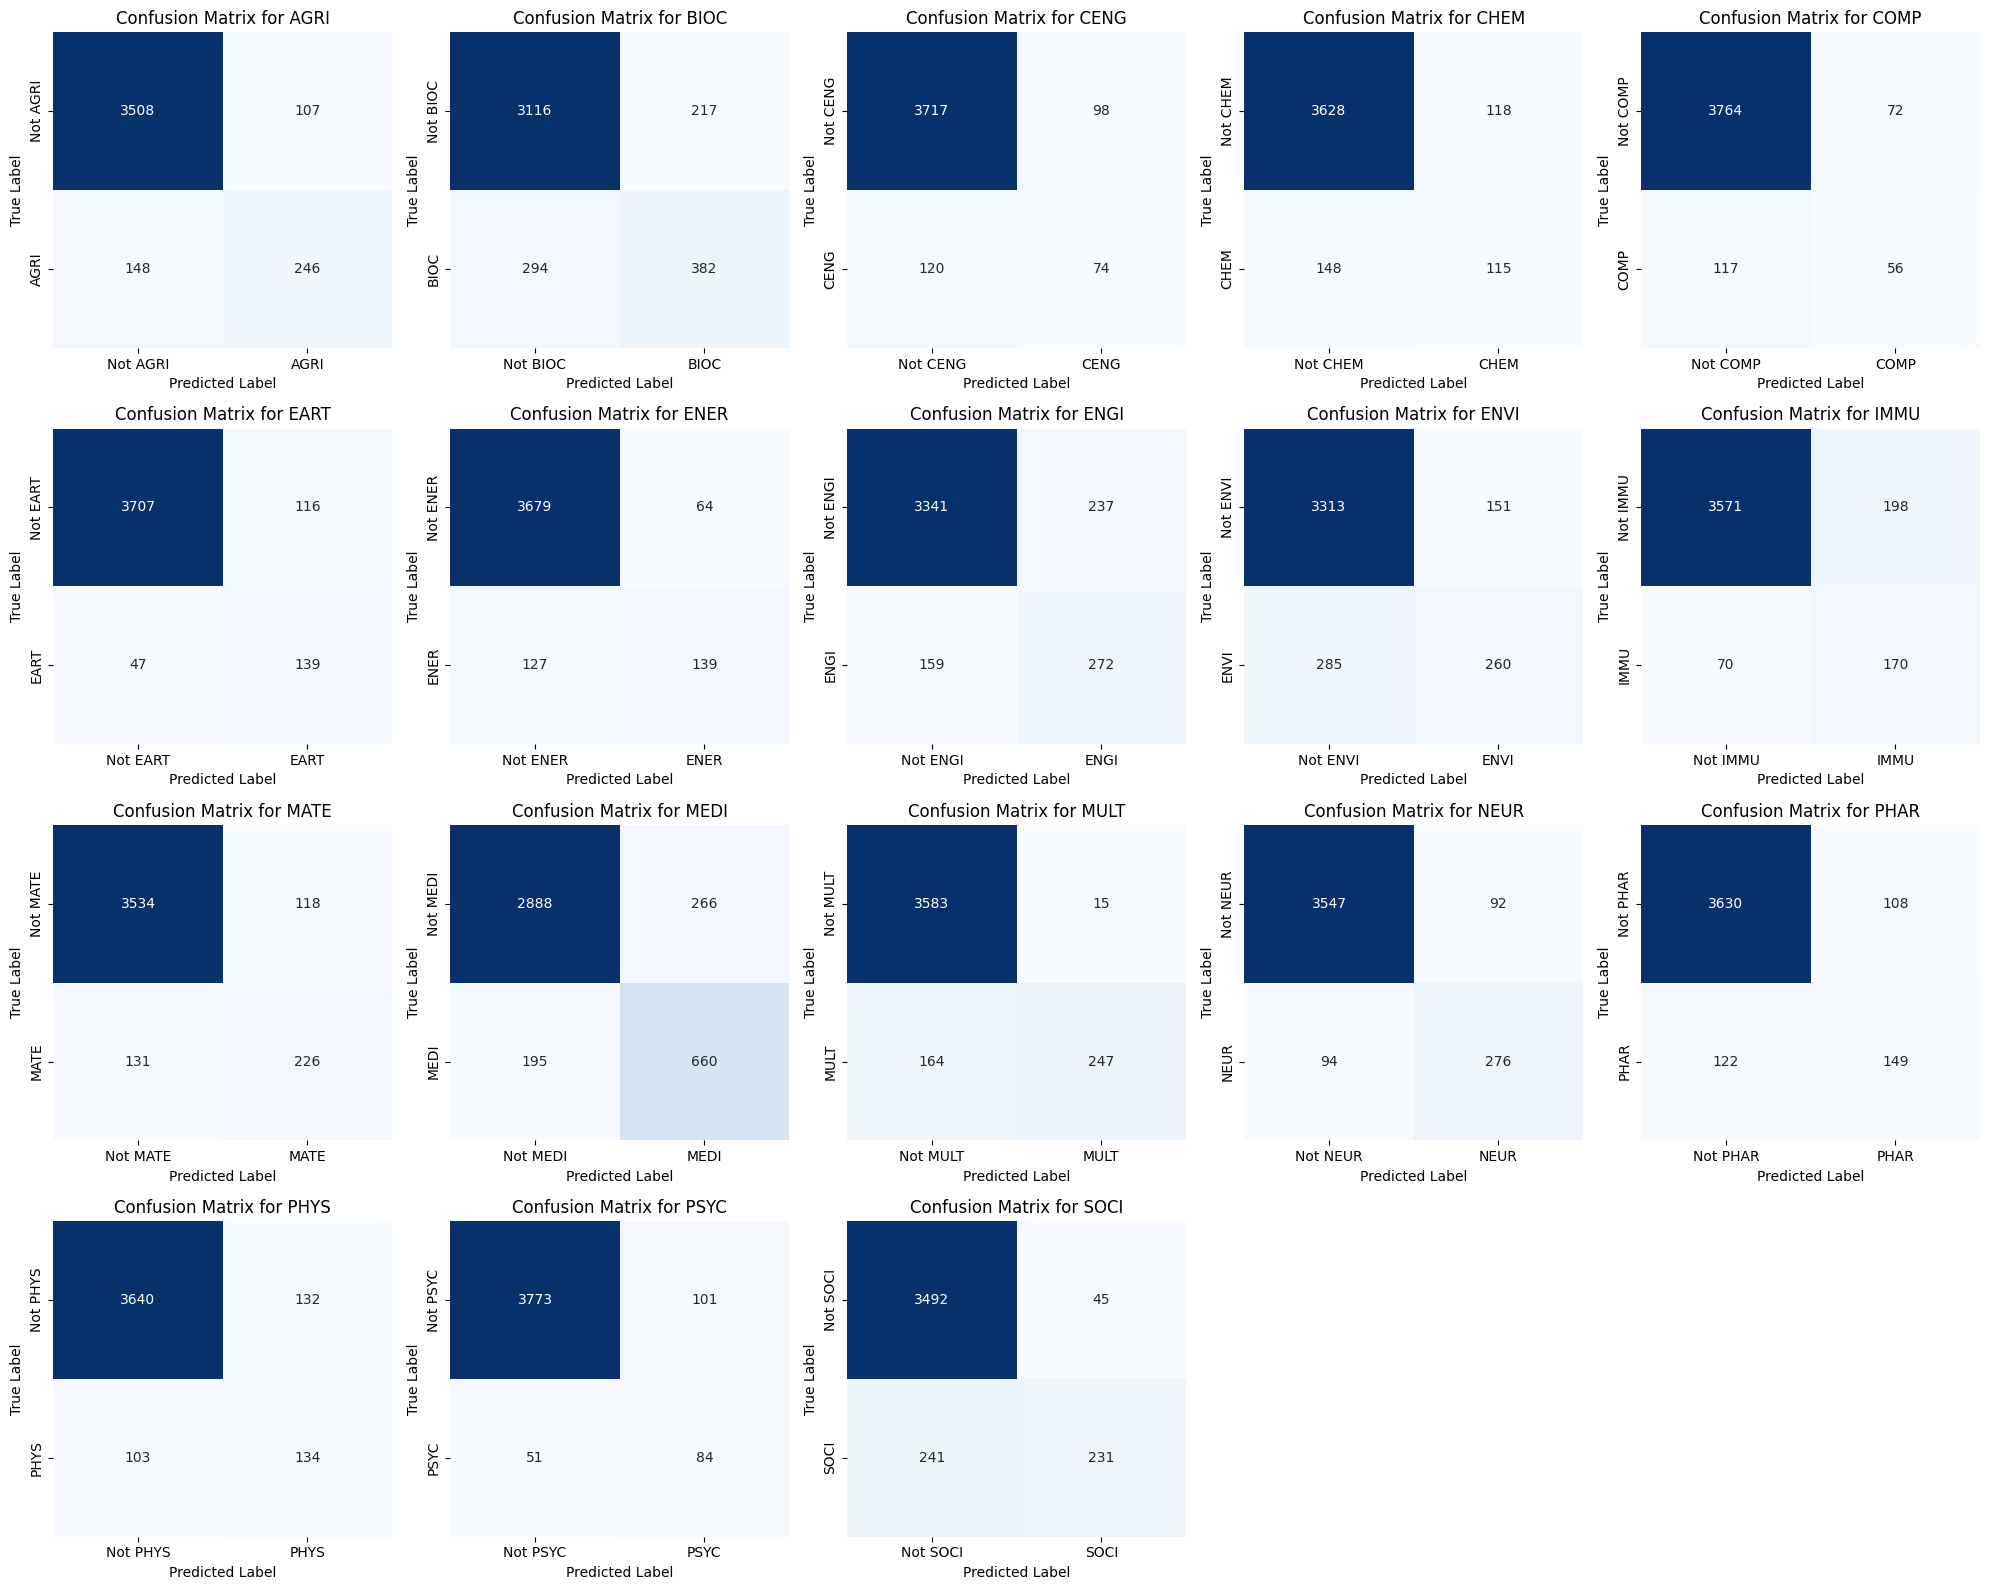

In [ ]:
from sklearn.metrics import classification_report, multilabel_confusion_matrix

def show_results(model, features, true_labels, classes, threshold=0.5):
    prob_predictions = model.predict(features)

    yhat_val = (prob_predictions >= threshold).astype(int)

    print(classification_report(true_labels, yhat_val, target_names=classes, zero_division=1))  # Set zero_division=1

    confusion_matrices = multilabel_confusion_matrix(true_labels, yhat_val)

    n_classes = len(classes)
    n_cols = 5
    n_rows = int(np.ceil(n_classes / n_cols))

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 4))

    axes = axes.flatten()

    for i, matrix in enumerate(confusion_matrices):
        sns.heatmap(matrix,
                    annot=True,
                    fmt='d',
                    cmap='Blues',
                    cbar=False,
                    ax=axes[i])
        axes[i].set_title(f'Confusion Matrix for {classes[i]}')
        axes[i].set_xlabel('Predicted Label')
        axes[i].set_ylabel('True Label')
        axes[i].set_xticklabels(['Not '+classes[i], classes[i]])
        axes[i].set_yticklabels(['Not '+classes[i], classes[i]], va='center')

    for ax in axes[n_classes:]:
        ax.axis('off')

    plt.tight_layout()
    plt.show()


show_results(pooler_bert_model,
             [valid_encodings.input_ids, valid_encodings.token_type_ids, valid_encodings.attention_mask],
             val_labels,
             target_names)


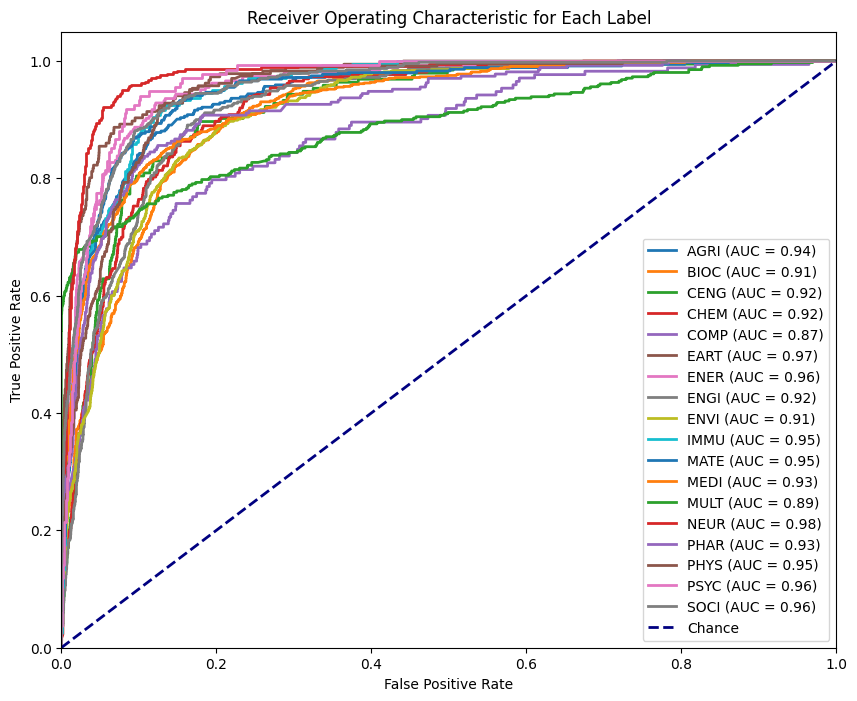

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_multilabel_roc(true_labels, predictions, target_names):
    """
    Function to plot the ROC curves for each label in multi-label classification.

    Parameters:
    - true_labels: Array-like of shape (n_samples, n_labels), ground truth label indicators.
    - predictions: Array-like of shape (n_samples, n_labels), prediction probabilities or decision function.
    - target_names: List of strings of shape (n_labels,), names of each of the labels.

    """
    n_labels = true_labels.shape[1]

    fig, ax = plt.subplots(figsize=(10, 8))

    for i in range(n_labels):
        fpr, tpr, _ = roc_curve(true_labels[:, i], predictions[:, i])
        roc_auc = auc(fpr, tpr)
        ax.plot(fpr, tpr, lw=2, label=f'{target_names[i]} (AUC = {roc_auc:.2f})')

    # Plot chance line
    ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Chance')

    # Customize the plot
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver Operating Characteristic for Each Label')
    ax.legend(loc="lower right")

    # Show the plot
    plt.show()

plot_multilabel_roc(val_labels, val_predictions, target_names)


In [ ]:
test_score = pooler_bert_model.evaluate([test_encodings.input_ids, test_encodings.token_type_ids, test_encodings.attention_mask],
                                                  test_labels)

print('Test loss:', test_score[0])
print('Test accuracy:', test_score[1])

126/126 [==============================] - 91s 720ms/step - loss: 0.1639 - accuracy: 0.5232
Test loss: 0.16392429172992706
Test accuracy: 0.5232036113739014


In [ ]:
test_predictions = pooler_bert_model.predict([test_encodings.input_ids, test_encodings.token_type_ids, test_encodings.attention_mask])

126/126 [==============================] - 90s 718ms/step


126/126 [==============================] - 91s 719ms/step
              precision    recall  f1-score   support

        AGRI       0.68      0.64      0.66       411
        BIOC       0.67      0.59      0.63       611
        CENG       0.43      0.37      0.40       204
        CHEM       0.46      0.51      0.48       227
        COMP       0.46      0.37      0.41       156
        EART       0.61      0.78      0.68       235
        ENER       0.71      0.51      0.59       235
        ENGI       0.53      0.61      0.57       431
        ENVI       0.59      0.51      0.55       524
        IMMU       0.44      0.63      0.52       246
        MATE       0.72      0.72      0.72       373
        MEDI       0.69      0.74      0.71       810
        MULT       0.94      0.61      0.74       485
        NEUR       0.79      0.76      0.78       361
        PHAR       0.54      0.50      0.52       243
        PHYS       0.46      0.61      0.53       216
        PSYC       0.44

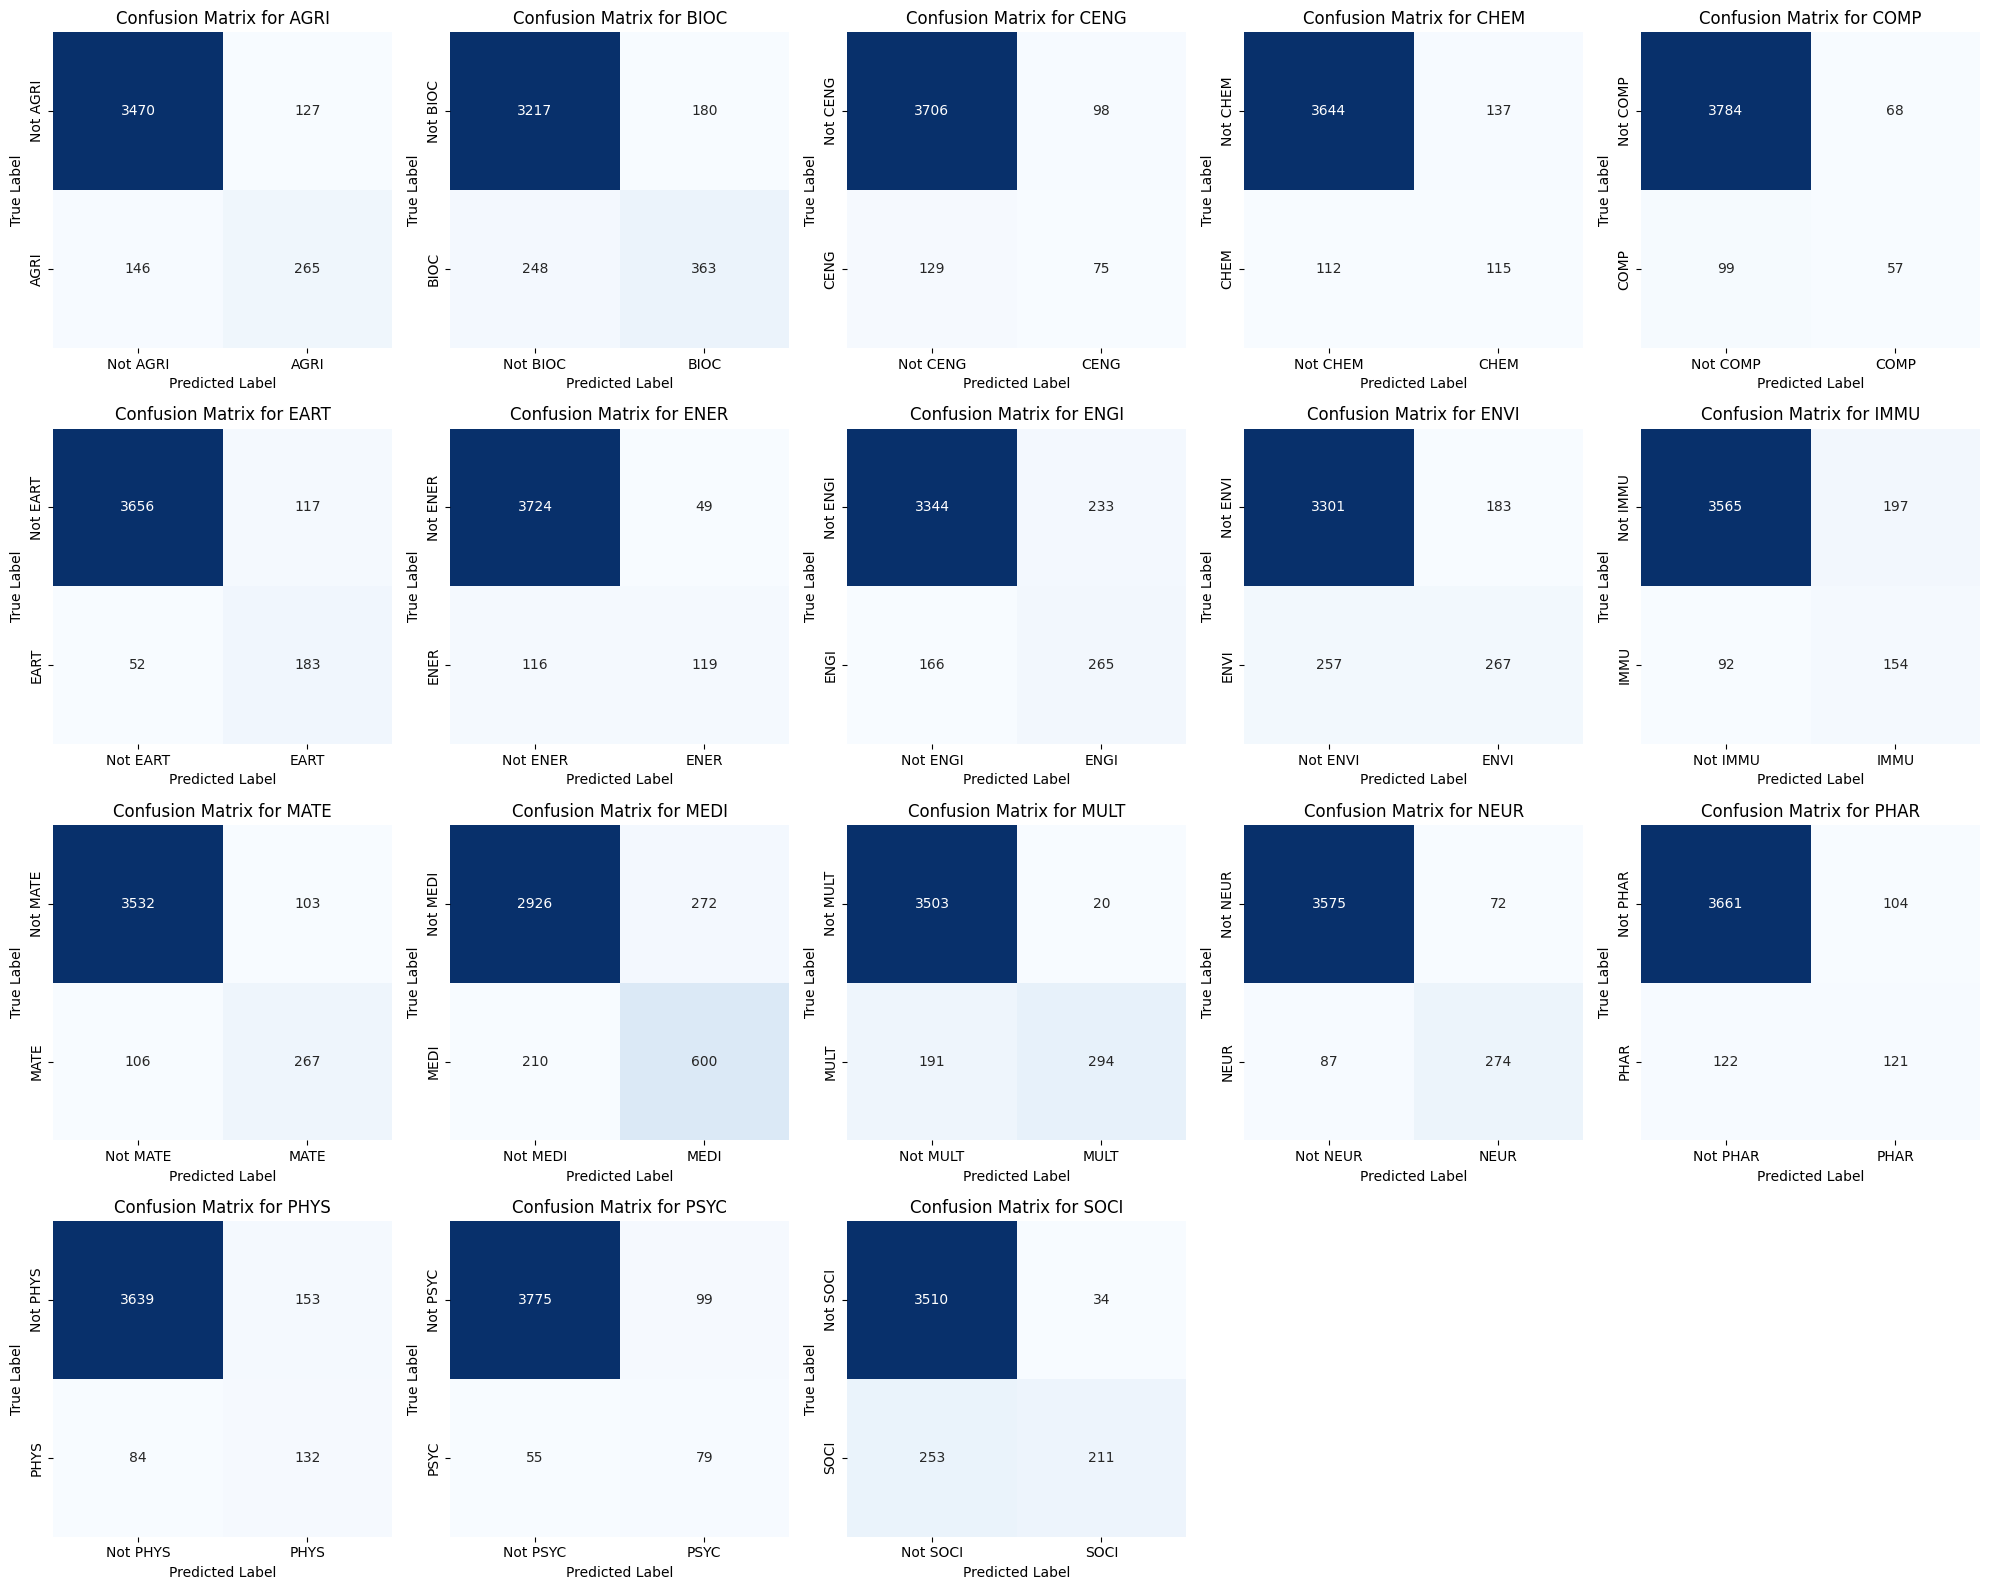

In [ ]:
from sklearn.metrics import classification_report, multilabel_confusion_matrix

def show_results(model, features, true_labels, classes, threshold=0.5):
    prob_predictions = model.predict(features)

    yhat_val = (prob_predictions >= threshold).astype(int)

    print(classification_report(true_labels, yhat_val, target_names=classes, zero_division=1))
    confusion_matrices = multilabel_confusion_matrix(true_labels, yhat_val)

    n_classes = len(classes)
    n_cols = 5
    n_rows = int(np.ceil(n_classes / n_cols))

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 4))

    axes = axes.flatten()

    for i, matrix in enumerate(confusion_matrices):
        sns.heatmap(matrix,
                    annot=True,
                    fmt='d',
                    cmap='Blues',
                    cbar=False,
                    ax=axes[i])
        axes[i].set_title(f'Confusion Matrix for {classes[i]}')
        axes[i].set_xlabel('Predicted Label')
        axes[i].set_ylabel('True Label')
        axes[i].set_xticklabels(['Not '+classes[i], classes[i]])
        axes[i].set_yticklabels(['Not '+classes[i], classes[i]], va='center')

    for ax in axes[n_classes:]:
        ax.axis('off')

    plt.tight_layout()
    plt.show()


show_results(pooler_bert_model,
             [test_encodings.input_ids, test_encodings.token_type_ids, test_encodings.attention_mask],
             test_labels,
             target_names)


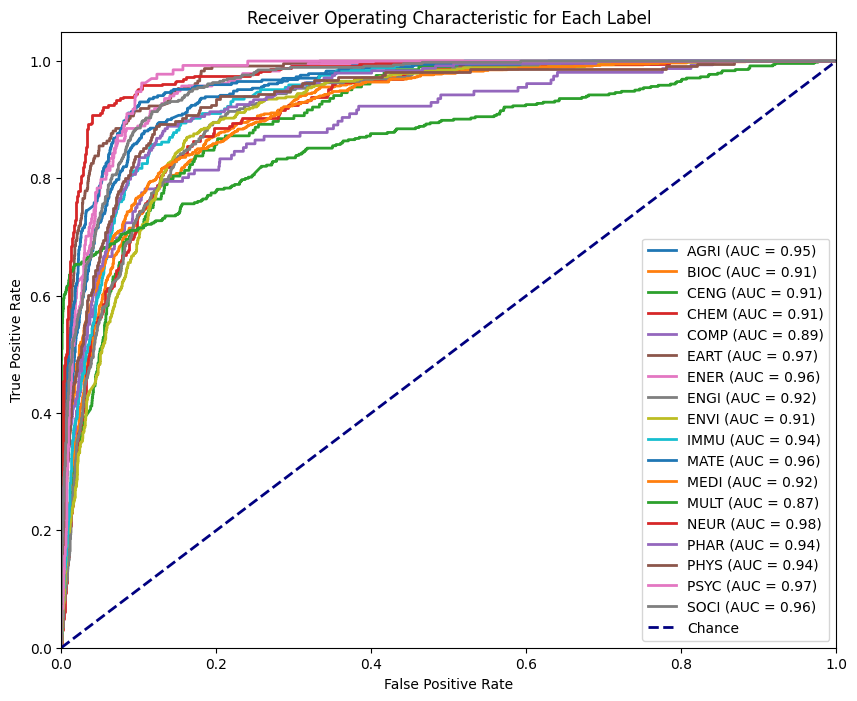

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

true_labels = test_labels

n_labels = true_labels.shape[1]

fig, ax = plt.subplots(figsize=(10, 8))

for i in range(n_labels):
    fpr, tpr, _ = roc_curve(true_labels[:, i], test_predictions[:, i])
    roc_auc = auc(fpr, tpr)

    ax.plot(fpr, tpr, lw=2, label=f'{target_names[i]} (AUC = {roc_auc:.2f})')

ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Chance')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic for Each Label')
ax.legend(loc="lower right")

plt.show()


In [ ]:
!pip install google-auth

In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

def save_predictions_to_csv(test_predictions, test_texts, test_df, target_names, result_path, threshold=0.5):
    """
    Process model predictions and save a CSV file with abstracts, true labels, predicted labels,
    the most probable predicted label, and its probability.

    Args:
        test_predictions (np.array): The predictions from the model, assumed to be probabilities.
        test_texts (list or np.array): The texts that were input to the model for prediction.
        test_df (pd.DataFrame): The original DataFrame containing the true labels.
        target_names (list): List of target class names corresponding to indices in model outputs.
        result_path (str, optional): Path to save the resulting CSV file. Defaults to './'.
        threshold (float, optional): Probability threshold to consider a prediction as positive. Defaults to 0.5.
    """
    predicted_labels = []
    max_probs = []
    max_labels = []

    for probs in test_predictions:
        # Identify labels exceeding the threshold
        labels = [target_names[idx] for idx, p in enumerate(probs) if p >= threshold]
        predicted_labels.append(labels)

        # Identify the max probability and corresponding label
        max_idx = np.argmax(probs)
        max_prob = probs[max_idx]
        max_label = target_names[max_idx]

        max_probs.append(max_prob)
        if labels:
            max_labels.append(max_label)
        else:
            max_probs[-1] = 0  # Reset max_prob if no labels meet the threshold
            max_labels.append("No Label")

    # Preparing the DataFrame
    result_df = pd.DataFrame({
        'abstract': test_texts,
        'true_label': test_df['subjareas'],
        'pred_label': predicted_labels,
        'max_pred_label': max_labels,
        'max_prediction_probability': max_probs
    })

    result_df['pred_label'] = result_df['pred_label'].apply(lambda x: ', '.join(x) if x else 'No Label')

    # Saving the results
    result_df.to_csv(result_path + 'bert_class_weights.csv', index=False)

    return result_df

result_path = '/content/drive/MyDrive/'
save_predictions_to_csv(test_predictions, test_texts, test_df, target_names, result_path)


Mounted at /content/drive


,abstract,true_label,pred_label,max_pred_label,max_prediction_probability
0,Tb3+ doped pentazinc bimolybdate pentahydrate ...,[PHYS],"CHEM, MATE, PHYS",PHYS,0.829084
1,A continuous supercritical water oxidation rea...,"[CHEM, ENVI]","CENG, CHEM, ENER",ENER,0.707320
2,Summary The transition from G1 into DNA replic...,"[BIOC, MEDI]",BIOC,BIOC,0.755586
3,While the stoichiometry of metabolism is proba...,"[IMMU, MEDI]",BIOC,BIOC,0.788774
4,Lactobacillus plantarum CS and Micrococcus lut...,[MULT],AGRI,AGRI,0.749980
...,...,...,...,...,...
4003,Interspecies translation of pharmacological pr...,"[BIOC, PHAR]",PHAR,PHAR,0.789900
4004,Purpose: Congenital mediastinal cysts are an u...,[MEDI],"IMMU, MEDI",MEDI,0.959728
4005,"Background: In developed countries, Human Immu...",[BIOC],"IMMU, MEDI",MEDI,0.835426
4006,Composite sandwich structures made of thick gl...,"[ENGI, MATE]","ENGI, MATE",ENGI,0.853682
